# Descriptive analysis on public database

https://www.kaggle.com/mylesoneill/world-university-rankings

## Importing libraries and loading dataset

In [1]:
import pandas as pd

# plot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/HP/Downloads/datasets/cwurData.csv')

# Drop unnecessary coloumns
df.drop(['broad_impact', 'year', 'publications', 'influence', 'citations', 'patents'], inplace=True, axis=1)
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,score
0,1,Harvard University,USA,1,7,9,1,100.00
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,91.67
2,3,Stanford University,USA,3,17,11,5,89.50
3,4,University of Cambridge,United Kingdom,1,10,24,4,86.17
4,5,California Institute of Technology,USA,4,2,29,7,85.21


## Measuring central tendency of the data

In [3]:
df.mean()

world_rank              459.590909
national_rank            40.278182
quality_of_education    275.100455
alumni_employment       357.116818
quality_of_faculty      178.888182
score                    47.798395
dtype: float64

In [4]:
df.median()

world_rank              450.5
national_rank            21.0
quality_of_education    355.0
alumni_employment       450.5
quality_of_faculty      210.0
score                    45.1
dtype: float64

In [5]:
df.mode()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,score
0,1,Arizona State University,USA,1.0,355.0,478.0,210.0,44.44
1,2,Boston University,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Brown University,NaN,NaN,NaN,NaN,NaN,NaN
3,4,California Institute of Technology,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Carnegie Mellon University,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
95,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


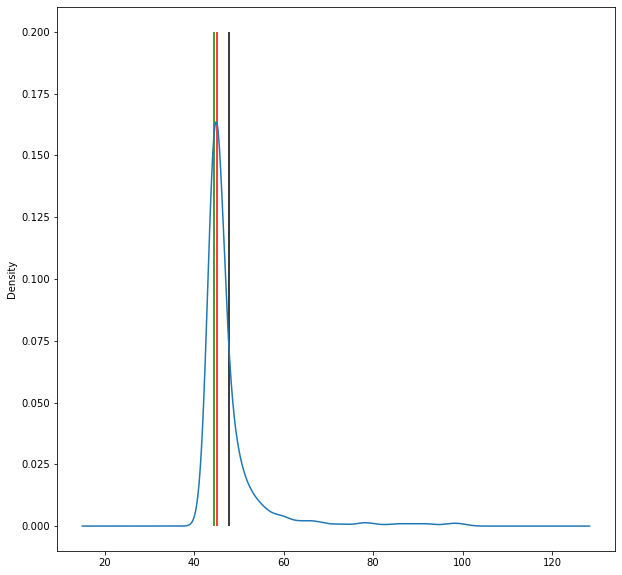

In [6]:
df["score"].plot(kind="density",
              figsize=(10,10));


plt.vlines(df["score"].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(df["score"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=1.5,
           color="red");

plt.vlines(df["score"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2, 
           linewidth=1.5,
           color="green");

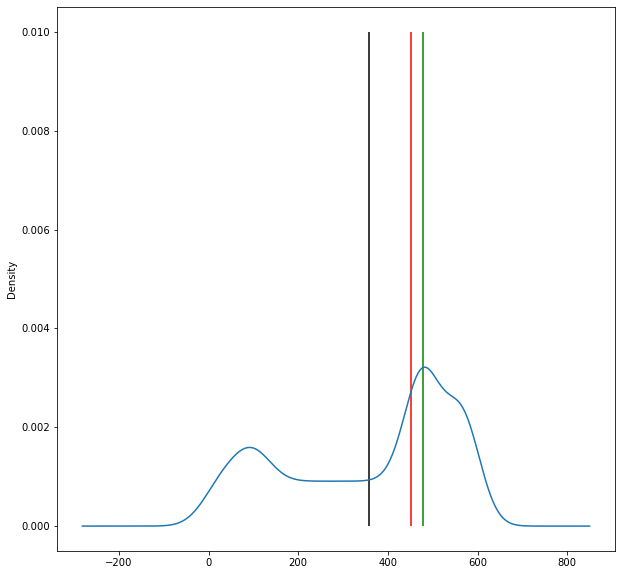

In [7]:
df["alumni_employment"].plot(kind="density",
              figsize=(10,10));


plt.vlines(df["alumni_employment"].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.01,
           linewidth=1.5);

plt.vlines(df["alumni_employment"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.01, 
           linewidth=1.5,
           color="red");

plt.vlines(df["alumni_employment"].mode(),   # Plot green line at median
           ymin=0, 
           ymax=0.01, 
           linewidth=1.5,
           color="green");

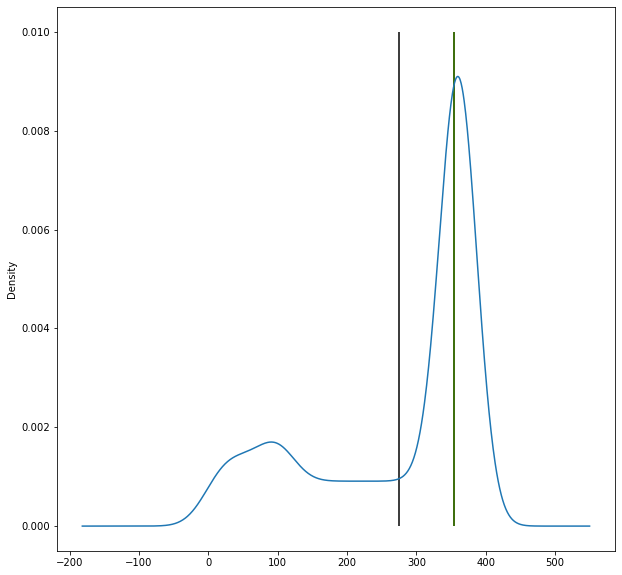

In [8]:
df["quality_of_education"].plot(kind="density",
              figsize=(10,10));


plt.vlines(df["quality_of_education"].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.01,
           linewidth=1.5);

plt.vlines(df["quality_of_education"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.01, 
           linewidth=1.5,
           color="red");

plt.vlines(df["quality_of_education"].mode(),   # Plot green line at median
           ymin=0, 
           ymax=0.01, 
           linewidth=1.5,
           color="green");

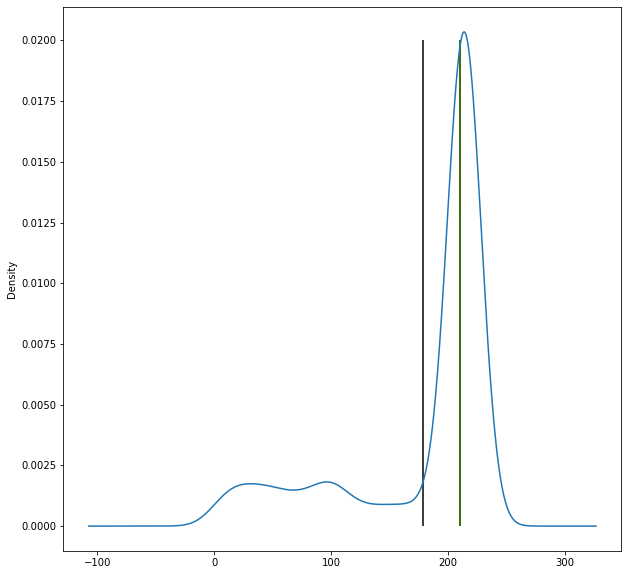

In [9]:
df["quality_of_faculty"].plot(kind="density",
              figsize=(10,10));


plt.vlines(df["quality_of_faculty"].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.02,
           linewidth=1.5);

plt.vlines(df["quality_of_faculty"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.02, 
           linewidth=1.5,
           color="red");

plt.vlines(df["quality_of_faculty"].mode(),   # Plot green line at median
           ymin=0, 
           ymax=0.02, 
           linewidth=1.5,
           color="green");

## Dispersion of data

In [10]:
print(max(df["quality_of_education"]) - min(df["quality_of_education"]))
print(max(df["quality_of_faculty"]) - min(df["quality_of_faculty"]))
print(max(df["alumni_employment"]) - min(df["alumni_employment"]))
print(max(df["score"]) - min(df["score"]))

366
217
566
56.64


In [11]:
five_num = [df["quality_of_education"].quantile(0),   
            df["quality_of_education"].quantile(0.25),
            df["quality_of_education"].quantile(0.50),
            df["quality_of_education"].quantile(0.75),
            df["quality_of_education"].quantile(1)]

five_num

[1.0, 175.75, 355.0, 367.0, 367.0]

In [12]:
df["alumni_employment"].describe()

count    2200.000000
mean      357.116818
std       186.779252
min         1.000000
25%       175.750000
50%       450.500000
75%       478.000000
max       567.000000
Name: alumni_employment, dtype: float64

In [13]:
df["quality_of_education"].quantile(0.75) - df["quality_of_education"].quantile(0.25)

191.25

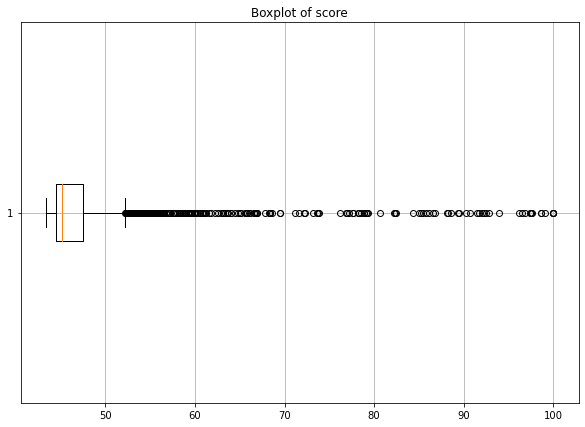

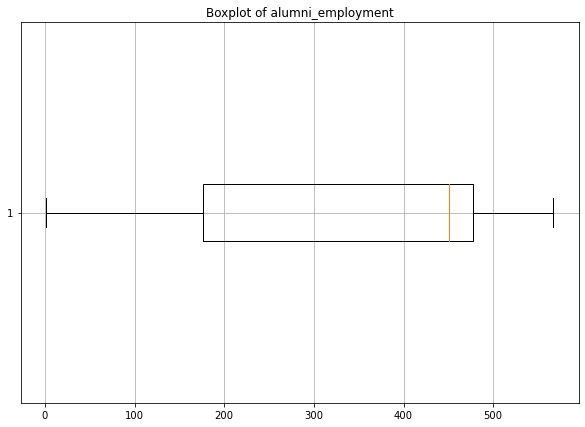

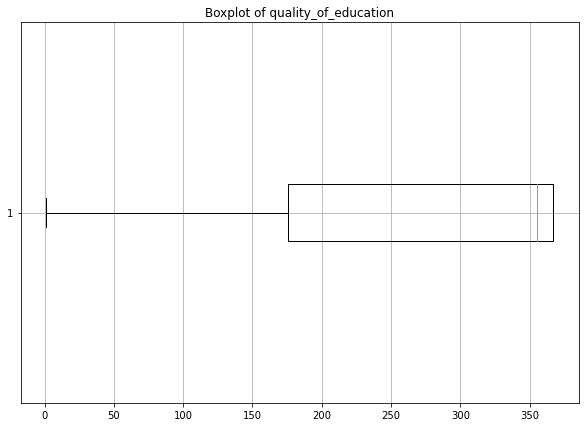

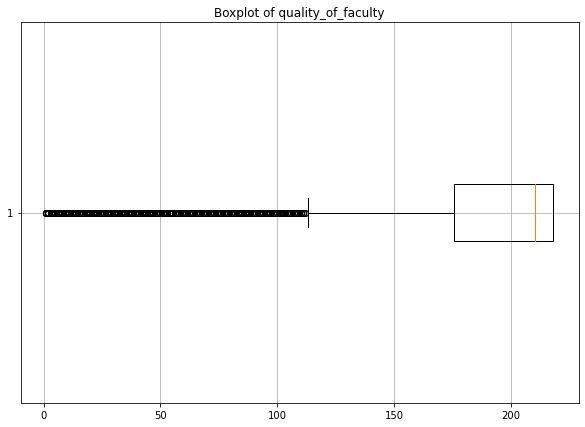

In [14]:
features_num = ['score', 'alumni_employment', 'quality_of_education', 'quality_of_faculty']

# plot distributions
for f in features_num:
    fig, ax = plt.subplots(figsize=(10,7))
    
    ax.boxplot(df[f], vert=False)
    ax.grid()   
    ax.set_title('Boxplot of ' + f)
    
    plt.show()

In [15]:
df.var()

world_rank              92610.883046
national_rank            2677.117668
quality_of_education    14868.168622
alumni_employment       34886.488848
quality_of_faculty       4102.515913
score                      60.230116
dtype: float64

In [16]:
df.std()

world_rank              304.320363
national_rank            51.740870
quality_of_education    121.935100
alumni_employment       186.779252
quality_of_faculty       64.050885
score                     7.760806
dtype: float64

In [17]:
abs_median_devs = abs(df["alumni_employment"] - df["alumni_employment"].median())

# Multipying by scaling factor
abs_median_devs.median() * 1.4826 

172.72289999999998

In [18]:
df.skew()

world_rank              0.108113
national_rank           1.974774
quality_of_education   -1.000067
alumni_employment      -0.508695
quality_of_faculty     -1.540628
score                   4.184903
dtype: float64

In [19]:
df.kurt()

world_rank              -1.278948
national_rank            3.270032
quality_of_education    -0.631788
alumni_employment       -1.234958
quality_of_faculty       0.828971
score                   19.835513
dtype: float64

## Graphical displays

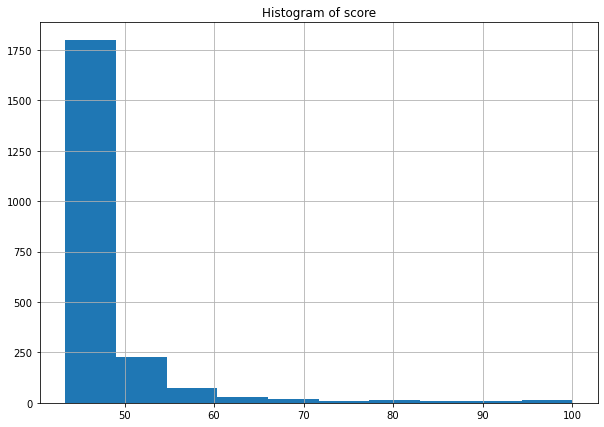

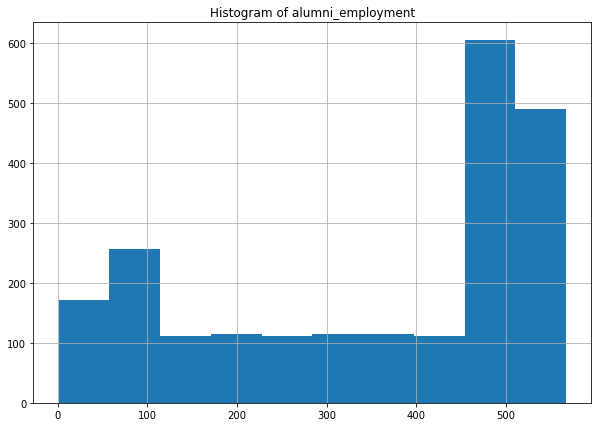

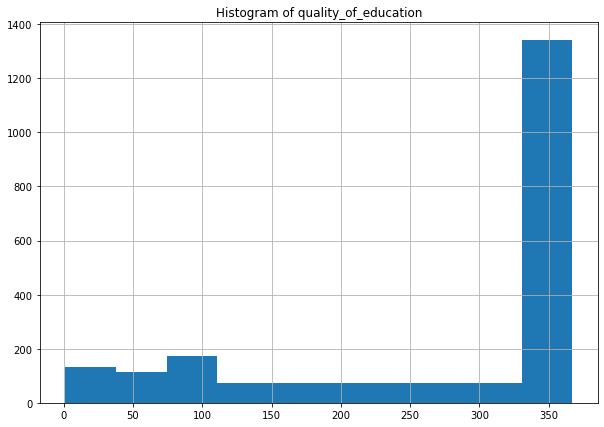

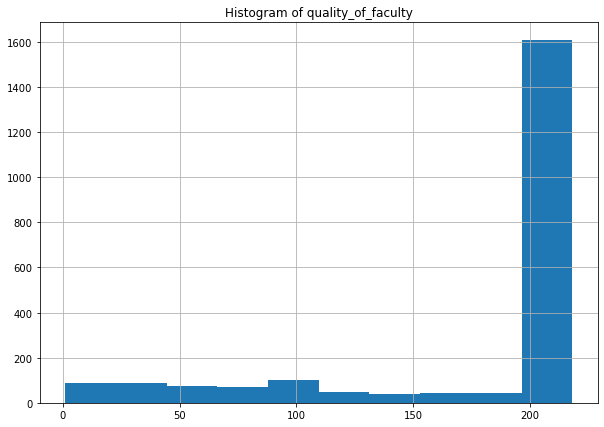

In [20]:
features_num = ['score', 'alumni_employment', 'quality_of_education', 'quality_of_faculty']

# plot distributions
for f in features_num:
    fig, ax = plt.subplots(figsize=(10,7))
    
    ax.hist(df[f])
    ax.grid()
    ax.set_title('Histogram of ' + f)
    
    plt.show()

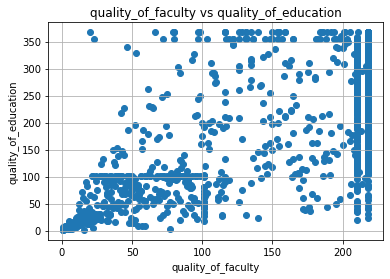

In [21]:
plt.scatter(df['quality_of_faculty'], df['quality_of_education'])
plt.title('quality_of_faculty vs quality_of_education')
plt.xlabel('quality_of_faculty')
plt.ylabel('quality_of_education')
plt.grid()
plt.show()

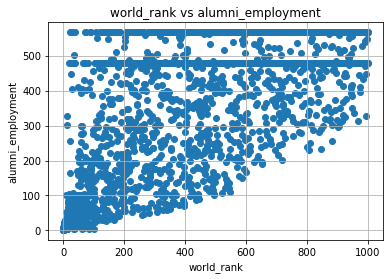

In [22]:
plt.scatter(df['world_rank'], df['alumni_employment'])
plt.title('world_rank vs alumni_employment')
plt.xlabel('world_rank')
plt.ylabel('alumni_employment')
plt.grid()
plt.show()

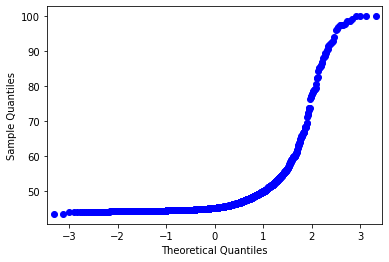

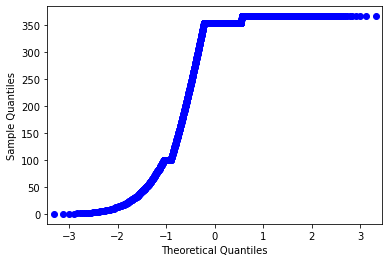

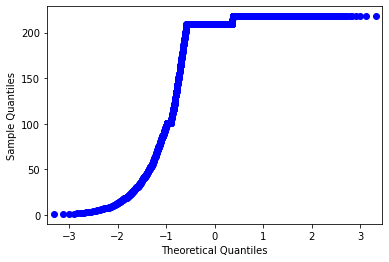

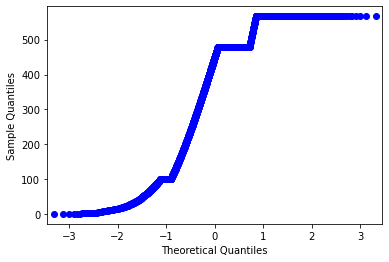

In [23]:
import numpy as np
import statsmodels.api as sm
import pylab as py
 
  
sm.qqplot(df["score"])
py.show()

sm.qqplot(df["quality_of_education"])
py.show()

sm.qqplot(df["quality_of_faculty"])
py.show()

sm.qqplot(df["alumni_employment"])
py.show()